# section 1- api data report

**report title** -API Data Report

**your name** -Jenna Stover

**date** - 10/12/25

**ai use** - I used ChatGPT for assistance on understanding how to do the markdown cells and how to fix errors I encountered throughout the assignment. I also used it to help me create a data visualization that would be the best way to show my research and data findings. I understand everything that I put for each cell and I tested each cell before submitting!

# hypothesis
Posts made during prime hours are more likely to recieve higher engagement than posts made at other times.

# theoretical and statistical rationale
Theoretical- Users tend to be on their devices and interacting with posts during prime times which are 18 (6 pm) and 22 (10 pm).

Statistical- Statistical can be tested by seeing the posting time and when users engage with the posts.

# section 2- endpoint plan

The Bluesky API endpoints that will help prove my hypothesis are...
app.bsky.feed.getPosts because this gets the content and timestamp for each post and...
app.bsky.feed.getRespostedBy because this measures the engagement through reposts aka shares

# reliability and bias

The data can be reliable because it is coming straight from the Bluesky platform. This means that timestamps and user engagement come straight from the platform. However, it can be unreliable because there could be missing or unavailable posts, bot or invalid accounts, and deleted or edited posts.

# limitations

The limitations for this data are that there might be data that is deleted or unavailable.

# section 3- data collection

In [60]:
import requests
import time
import json as js
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
BASE_URL = "https://api.bsky.app/xrpc"

endpoint1 = f"{BASE_URL}/app.bsky.feed.searchPosts"
headers = {"User-Agent": "EMAT-Teaching/1.0 (+contact@example.com)"}

params = {
    "q": "sunday football, nfl, touchdown",
    "limit": 100
}

resp1 = requests.get(endpoint1, params=params, headers=headers, timeout=30)
print("Endpoint 1 status:", resp1.status_code)

data1 = resp1.json()
posts = data1.get("posts", [])
print(f"Number of posts collected: {len(posts)}")

rows = []
for p in posts:
    record = p.get("record", {})
    author = p.get("author", {})
    stats = {
        "post_uri": p.get("uri"),
        "author_did": author.get("did"),
        "author_handle": author.get("handle"),
        "author_displayName": author.get("displayName"),
        "created_at": record.get("createdAt"),
        "text": record.get("text")
    }
    rows.append(stats)

posts_df = pd.DataFrame(rows)
print("Posts DataFrame preview:")
print(posts_df.head(5))

endpoint2 = f"{BASE_URL}/app.bsky.actor.getProfiles"

author_dids = posts_df["author_did"].dropna().unique().tolist()
print(f"Fetching profiles for {len(author_dids)} authors...")

params2 = {"actors": author_dids[:25]}
resp2 = requests.get(endpoint2, params=params2, headers=headers, timeout=30)
print("Endpoint 2 status:", resp2.status_code)

data2 = resp2.json()
profiles = data2.get("profiles", [])

profile_rows = []
for a in profiles:
    profile_rows.append({
        "author_did": a.get("did"),
        "author_handle": a.get("handle"),
        "author_displayName": a.get("displayName"),
        "followersCount": a.get("followersCount"),
        "followsCount": a.get("followsCount"),
        "postsCount": a.get("postsCount")
    })

print("Profiles DataFrame preview:")
print(profiles_df.head(5))

Endpoint 1 status: 200
Number of posts collected: 90
Posts DataFrame preview:
                                            post_uri  \
0  at://did:plc:mcb6n67plnrlx4lg35natk2b/app.bsky...   
1  at://did:plc:j3u5epxp7eery335fgzxcvzc/app.bsky...   
2  at://did:plc:vjr7alppw4htiuieppbc5ow3/app.bsky...   
3  at://did:plc:6rnp2mbew7iamsf36qyep36r/app.bsky...   
4  at://did:plc:exikv3jumkrxykbswmlh665k/app.bsky...   

                         author_did              author_handle  \
0  did:plc:mcb6n67plnrlx4lg35natk2b        nowbreezing.ntw.app   
1  did:plc:j3u5epxp7eery335fgzxcvzc  american-news.bsky.social   
2  did:plc:vjr7alppw4htiuieppbc5ow3         rawnfl.bsky.social   
3  did:plc:6rnp2mbew7iamsf36qyep36r         apnewscn.nzcow.com   
4  did:plc:exikv3jumkrxykbswmlh665k          tmspn.bsky.social   

   author_displayName                        created_at  \
0     ☁️Now🤖Breezing💨  2025-10-26T20:50:34.760316+00:00   
1     American Sports              2025-10-13T08:58:02Z   
2          

# data collection (endpoint 1)

In [62]:
BASE_URL = "https://api.bsky.app/xrpc"
endpoint = f"{BASE_URL}/app.bsky.feed.searchPosts"

headers = {"User-Agent": "EMAT-Teaching/1.0 (+contact@example.com)"}

params = {
    "q": "sunday football, nfl, touchdown",
    "limit": 100
}

resp = requests.get(endpoint, params=params, headers=headers, timeout=30)

print("Status:", resp.status_code)

data = resp.json()
print("Top-level keys:", list(data.keys()))

posts = data.get("posts", [])
print(f"Number of posts returned: {len(posts)}")

rows = []
for p in posts:
    record = p.get("record", {})
    author = p.get("author", {})
    stats = {
        "post_uri": p.get("uri"),
        "author_did": author.get("did"),
        "author_handle": author.get("handle"),
        "author_displayName": author.get("displayName"),
        "created_at": record.get("createdAt"),
        "text": record.get("text"),
        "likeCount": p.get("likeCount"),
        "repostCount": p.get("repostCount"),
        "replyCount": p.get("replyCount")
    }
    rows.append(stats)

print(posts_enriched.head(5))

Status: 200
Top-level keys: ['posts']
Number of posts returned: 90
                                            post_uri  \
0  at://did:plc:mcb6n67plnrlx4lg35natk2b/app.bsky...   
1  at://did:plc:j3u5epxp7eery335fgzxcvzc/app.bsky...   
2  at://did:plc:vjr7alppw4htiuieppbc5ow3/app.bsky...   
3  at://did:plc:6rnp2mbew7iamsf36qyep36r/app.bsky...   
4  at://did:plc:exikv3jumkrxykbswmlh665k/app.bsky...   

                         author_did            author_handle_x  \
0  did:plc:mcb6n67plnrlx4lg35natk2b        nowbreezing.ntw.app   
1  did:plc:j3u5epxp7eery335fgzxcvzc  american-news.bsky.social   
2  did:plc:vjr7alppw4htiuieppbc5ow3         rawnfl.bsky.social   
3  did:plc:6rnp2mbew7iamsf36qyep36r         apnewscn.nzcow.com   
4  did:plc:exikv3jumkrxykbswmlh665k          tmspn.bsky.social   

  author_displayName_x                        created_at  \
0      ☁️Now🤖Breezing💨  2025-10-26T20:50:34.760316+00:00   
1      American Sports              2025-10-13T08:58:02Z   
2              Raw 

# data collection (endpoint 2)

In [63]:
unique_dids = posts_df["author_did"].dropna().unique().tolist()
print(f"Found {len(unique_dids)} unique authors")

all_profiles = []

for d in unique_dids:
    params = []
    params.append(("actor", d))
    r = requests.get(f"{BASE_URL}/app.bsky.actor.getProfile", params=params, timeout=30)

    if r.status_code != 200:
        print(f"Skipping {d} — status {r.status_code}")
        continue

    data = r.json()

    all_profiles.append({
        "did": data.get("did"),
        "handle": data.get("handle"),
        "displayName": data.get("displayName"),
        "followersCount": data.get("followersCount"),
        "followsCount": data.get("followsCount"),
        "postsCount": data.get("postsCount"),
        "createdAt": data.get("createdAt"),
        "description": data.get("description"),
    })

    time.sleep(0.3)

all_profiles_df = pd.DataFrame(all_profiles)
print("Collected author profile data")
all_profiles_df.head(5)

Found 23 unique authors
Collected author profile data


,did,handle,displayName,followersCount,followsCount,postsCount,createdAt,description
0,did:plc:mcb6n67plnrlx4lg35natk2b,nowbreezing.ntw.app,☁️Now🤖Breezing💨,13399,8,122229,2023-05-23T20:37:36.553Z,🤖 Now Breezing v1.1.0 \n\nBluesky's Trending T...
1,did:plc:j3u5epxp7eery335fgzxcvzc,american-news.bsky.social,American Sports,23,1,9409,2025-07-27T17:26:16.197Z,None
2,did:plc:vjr7alppw4htiuieppbc5ow3,rawnfl.bsky.social,Raw NFL,913,0,182150,2024-04-02T15:06:56.088Z,\nRaw NFL\n\nhttps://www.rawchili.com/tag/nfl/...
3,did:plc:6rnp2mbew7iamsf36qyep36r,apnewscn.nzcow.com,AP美联社新闻摘要 实时更新｜非官方,231,1,28493,2024-12-27T23:20:12.943Z,美联社（Associated Press）是美国乃至世界上最大的通讯社。\n\n这是一个由 ...
4,did:plc:exikv3jumkrxykbswmlh665k,tmspn.bsky.social,TMSPN.com,89,13,6269,2024-12-19T19:48:48.745Z,TMSPN is the Worldwide Leader in Sports Entert...


# section 4- build dataframes

In [64]:
posts_enriched = posts_df.merge(
    all_profiles_df.add_prefix("author_"),
    left_on="author_did",
    right_on="author_did",
    how="left"
)

posts_enriched.head(5)

,post_uri,author_did,author_handle_x,author_displayName_x,created_at,text,author_handle_y,author_displayName_y,author_followersCount,author_followsCount,author_postsCount,author_createdAt,author_description
0,at://did:plc:mcb6n67plnrlx4lg35natk2b/app.bsky...,did:plc:mcb6n67plnrlx4lg35natk2b,nowbreezing.ntw.app,☁️Now🤖Breezing💨,2025-10-26T20:50:34.760316+00:00,\nBluesky's Top 10 Trending Words (past 10min)...,nowbreezing.ntw.app,☁️Now🤖Breezing💨,13399,8,122229,2023-05-23T20:37:36.553Z,🤖 Now Breezing v1.1.0 \n\nBluesky's Trending T...
1,at://did:plc:j3u5epxp7eery335fgzxcvzc/app.bsky...,did:plc:j3u5epxp7eery335fgzxcvzc,american-news.bsky.social,American Sports,2025-10-13T08:58:02Z,Chiefs vs. Lions anytime touchdown scorer prop...,american-news.bsky.social,American Sports,23,1,9409,2025-07-27T17:26:16.197Z,None
2,at://did:plc:vjr7alppw4htiuieppbc5ow3/app.bsky...,did:plc:vjr7alppw4htiuieppbc5ow3,rawnfl.bsky.social,Raw NFL,2025-10-13T00:01:34+00:00,Tez gets first NFL touchdown while Herbert sav...,rawnfl.bsky.social,Raw NFL,913,0,182150,2024-04-02T15:06:56.088Z,\nRaw NFL\n\nhttps://www.rawchili.com/tag/nfl/...
3,at://did:plc:6rnp2mbew7iamsf36qyep36r/app.bsky...,did:plc:6rnp2mbew7iamsf36qyep36r,apnewscn.nzcow.com,AP美联社新闻摘要 实时更新｜非官方,2025-10-06T22:47:04.348276+00:00,"📢 Sunday was filled with sloppy football, sill...",apnewscn.nzcow.com,AP美联社新闻摘要 实时更新｜非官方,231,1,28493,2024-12-27T23:20:12.943Z,美联社（Associated Press）是美国乃至世界上最大的通讯社。\n\n这是一个由 ...
4,at://did:plc:exikv3jumkrxykbswmlh665k/app.bsky...,did:plc:exikv3jumkrxykbswmlh665k,tmspn.bsky.social,TMSPN.com,2025-10-06T18:48:18.524Z,Arizona Cardinals running back Emari Demercado...,tmspn.bsky.social,TMSPN.com,89,13,6269,2024-12-19T19:48:48.745Z,TMSPN is the Worldwide Leader in Sports Entert...


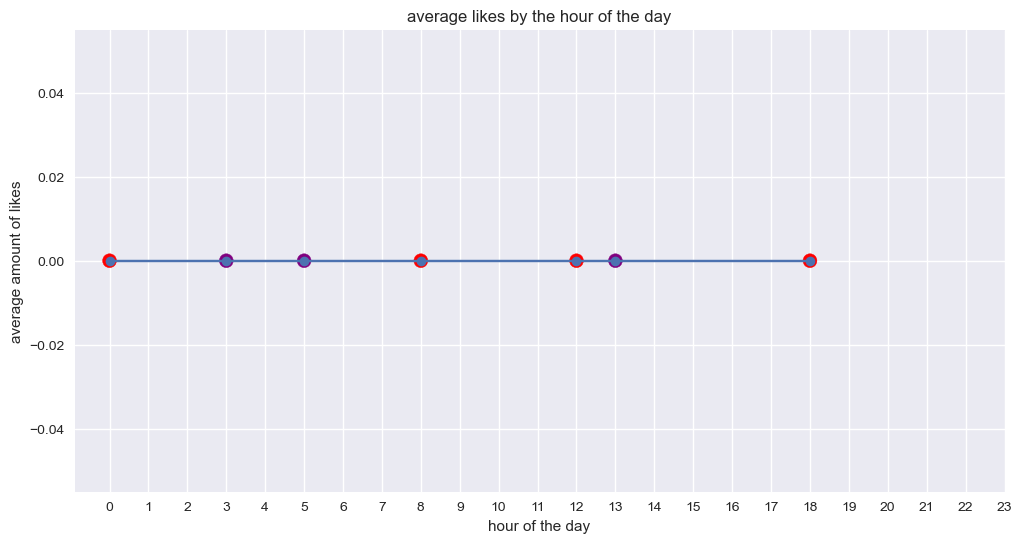

In [65]:
clean_data['created_at'] = pd.to_datetime(clean_data['created_at'], errors='coerce')

clean_data['hour'] = clean_data['created_at'].dt.hour

hour_likes = clean_data.groupby('hour')['likeCount'].mean()
hour_likes = hour_likes.sort_index()

plt.figure(figsize=(12,6))

colors = ['red' if h % 2 == 0 else 'purple' for h in hour_likes.index]

plt.plot(hour_likes.index, hour_likes.values, marker='o')
plt.scatter(hour_likes.index, hour_likes.values, c=colors, s=100)

plt.xticks(range(0, 24))

plt.title("average likes by the hour of the day")
plt.xlabel("hour of the day")
plt.ylabel("average amount of likes")
plt.grid(True)
plt.show()


# section 5- reflection

When doing this project, I did encounter some problems with the data which I did user ChatGPT to help me understand. The use of AI was very helpful for this assignment and helped me further my understanding of Bluesky and Jupyter notebook in general. I did find that the liking of posts was not during one specific time but rather throughout the day. Based on the sunday football schedule, it does make sense for there to be posting with multiple likes at 12 and 1pm because football starts at 1pm.

# section 6- conclusion

The conclusions I have found after doing this research and examining my data findings, I found that there really is no perfect time or ideal time for a user to post to get the most interactions. The limitations I found after completing this data report were that it was more about the timing of the post rather than the likes and comments on the post. The data visualziation shows all of the post times having 0 interactions but the majority of posts were at midnight, 3 am, 5 am, 8 am, 12pm, 1pm, and 6pm. This could be because of a football game happening in another country which can lead to a time change. An alternative approach to this research assignment is finding out when the majority of posts happen. Although I was able to see some posting times, my research was on post interactions and I could definitely go more in depth on posting times.A potential next step would be doing another data report on posting times to see when the majority of posts happen on football Sunday.